In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

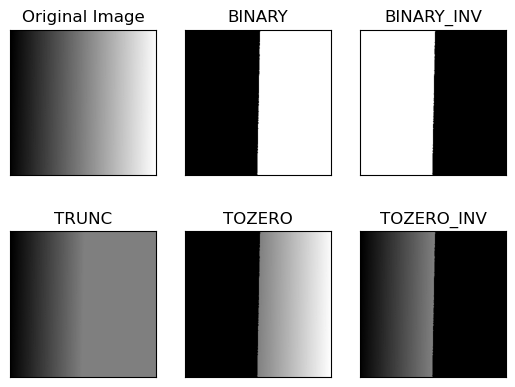

In [2]:
# thresholding = 기준값을 기준으로 값을 흑/백으로 분류하는 작업
# https://opencv-python.readthedocs.io/en/latest/doc/09.imageThresholding/imageThresholding.html

# cv.threshold 함수의 입력은 반드시 그레이스케일이어야 함! (주의)
# 이미지, 임계값(픽셀), 임계값을 넘어서는 픽셀에 할당된 최대 값, 임계값 처리 유형
# cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# thresholding type = cv.THRESH_BINARY, cv.THRESH_BINARY_INV, cv.THRESH_TRUNC, cv.THRESH_TOZERO, cv.THRESH_TOZERO_INV

img = cv.imread('../samples/gradient.png',0)

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

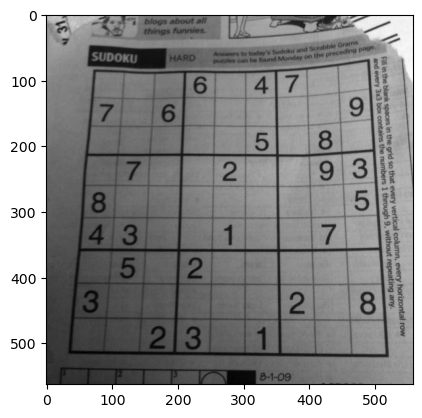

In [3]:
img = cv.imread('../samples/sudoku.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray')

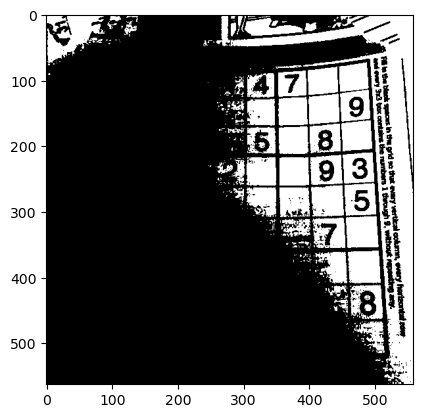

In [4]:
# 일반 thresholding

res, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
plt.imshow(th1, 'gray')

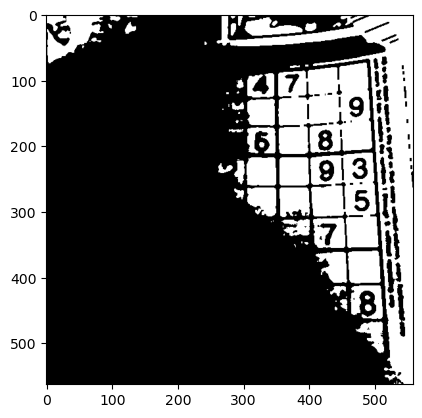

In [5]:
# 일반 thresholding

img1 = cv.medianBlur(img, 5)

res, th1 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)
plt.imshow(th1, 'gray')

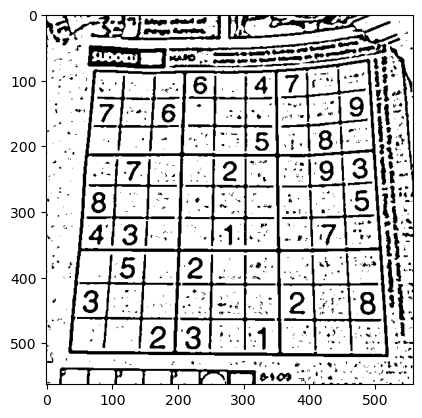

In [6]:
# adaptive mean thresholding

th2 = cv.adaptiveThreshold(img1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
plt.imshow(th2, 'gray')

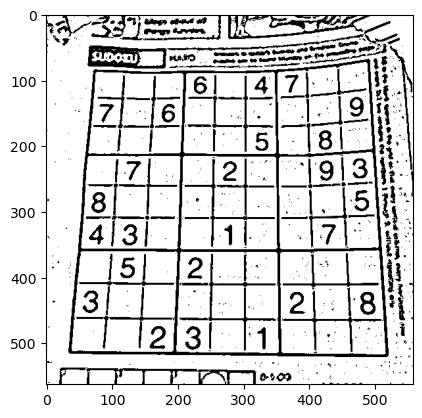

In [7]:
# adaptive gaussian thresholding

th3 = cv.adaptiveThreshold(img1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.imshow(th3, 'gray')

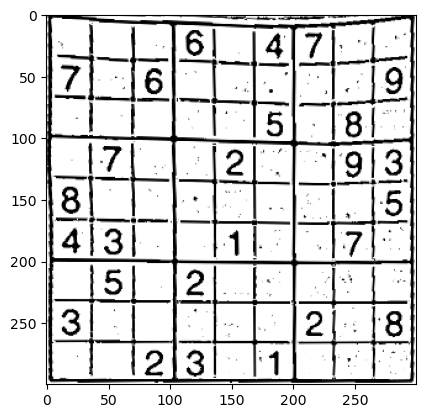

In [10]:
r, c = th3.shape[:2]

pts1 = np.float32([[70, 85], [495, 68], [30, 520], [525, 525]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

m = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(th3, m, (300, 300))

plt.imshow(dst, 'gray')